In [1]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from torchtoolbox.transform import Cutout
import torch

torch.Size([3, 32, 32])

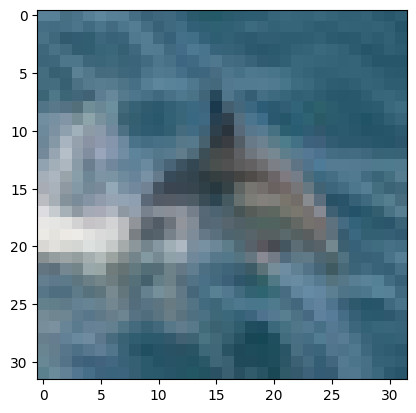

In [4]:
tp = Image.open("../train/aquatic_mammals_dolphin/10.jpg").convert("RGB")
transform = transforms.Compose([
    transforms.Resize(size=32),        # 重置大小
    transforms.RandomCrop(32, padding=4),#每边填充4，把32^*32填充至40*40，再随机裁剪
    Cutout(1, scale=(0.1, 0.2)),#随机遮挡
    transforms.ColorJitter(0.2, 0.2, 0.2), # 颜色抖动
    transforms.GaussianBlur(1, 2.0),     # 高斯模糊
    transforms.RandomHorizontalFlip(p=0.3), # 水平翻转
    transforms.RandomVerticalFlip(p=0.3),   # 垂直翻转
    # transforms.RandomRotation((-10, 10)),   # 随机旋转
    transforms.ToTensor()
])
plt.imshow(tp)
tp1 = transform(tp)
tot = transforms.ToTensor()
tp = tot(tp)
tp1.shape



torch.Size([1, 3, 32, 32])

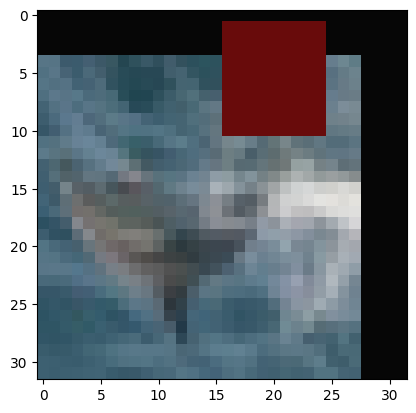

In [5]:
plt.imshow(tp1.permute(1,2,0).numpy())
tp1.unsqueeze(0).shape

In [60]:
import timm
model = timm.create_model("mobilenetv2_100", pretrained=True, num_classes = 1280)
model.eval()
import json
with open("imagenet_class_index.json", "r") as f:
    label = json.load(f)

In [62]:
model.eval()
# print(model.num_features)

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU6(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU6(inplace=True)
        (se): Identity()
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_

In [38]:
res1 = model(tp1.unsqueeze(0))
with torch.no_grad():
    print(label[str(int(model(tp1.unsqueeze(0)).argmax()))])
    print(label[str(int(model(tp.unsqueeze(0)).argmax()))])

['n01518878', 'ostrich']
['n01494475', 'hammerhead']


In [63]:
model(tp1.unsqueeze(0)).shape

torch.Size([1, 1280])

In [39]:
import urllib
# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename)
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
out = model(tp.unsqueeze(0))
probabilities = torch.nn.functional.softmax(out[0], dim=0)
# Print top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

hammerhead 0.1978617012500763
tiger shark 0.1261858344078064
hen 0.10706319659948349
electric ray 0.09781156480312347
cock 0.09699104726314545


In [59]:
features = timm.create_model("mobilenetv2_100", pretrained=True, features_only=True)
features.eval()


EfficientNetFeatures(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU6(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU6(inplace=True)
        (se): Identity()
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_

In [55]:
features(tp.unsqueeze(0)).shape

torch.Size([1, 1000])

In [47]:
dir(features)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_stage_out_idx',
 '_state_dict_hooks',
 '_version',
 'act1',
 'add_module',
 'apply',
 'bfloat16',
 'blocks',
 'bn1',
 'buffers',
 'children',
 'con

In [51]:
features.feature_size

ModuleAttributeError: 'EfficientNetFeatures' object has no attribute 'feature_size'

In [66]:
batch = torch.rand(10, 3, 224, 224)

In [67]:
model(batch).shape

torch.Size([10, 1280])

In [68]:
model.forward_features(batch).shape

torch.Size([10, 1280, 7, 7])

In [1]:
import timm
timm.list_models("*deit*")

['deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224']

In [2]:
ic = timm.create_model("vit_base_patch16_224", pretrained=True, features_only=True)
ic.eval()

RuntimeError: features_only not implemented for Vision Transformer models.

In [2]:
icf = timm.create_model("deit_base_distilled_patch16_224", pretrained=True)
icf.eval()

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_distilled_patch16_224-df68dfff.pth" to C:\Users\沃伊泰克/.cache\torch\hub\checkpoints\deit_base_distilled_patch16_224-df68dfff.pth


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn

In [15]:
# dir(icf)
icf.num_features
dir(ic)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_collect',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module

In [3]:
import torch
p = (icf(torch.randn(1, 3, 224, 224)))
p[0].shape

torch.Size([1000])

In [22]:
ic.feature_info.channels()

[64, 160, 384, 1024, 1536]

In [7]:
res = icf.forward_features(torch.randn(1, 3, 224, 224))
res[0].shape

torch.Size([1, 768])

In [50]:

from torch.nn import Flatten
from torch import nn

classifier = nn.Sequential(
    nn.AdaptiveAvgPool2d(1, ),
    Flatten(start_dim=1, end_dim=-1),
    nn.Linear(1536, 256),   # 较小层宽,根据特征数适当选择
    nn.ReLU(),
    nn.BatchNorm1d(256),    # 添加BatchNorm归一化
    nn.Dropout(0.2),
    nn.Linear(in_features=256, out_features=10, bias=True)
)

In [51]:
classifier(res).shape

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 256])